In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
!pip install mlxtend
import imblearn
!pip install catboost
!pip install xgboost
!pip install lightgbm
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report

from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#catboost

from catboost import CatBoostClassifier
drive.mount('/content/drive')



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


     |████████████████████████████████| 66.2MB 52kB/s 
Mounted at /content/drive


In [ ]:
# Stackingcvclassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#catboost

from catboost import CatBoostClassifier
training_data = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/train.xlsx')
training_data.drop('ID', axis = 1, inplace = True)
training_data.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

X = training_data.drop("Crop_status", axis=1)
y = training_data["Crop_status"]
X.fillna(X["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)

X["Number_of_Weeks_Used"] = X["Number_of_Weeks_Used"].astype(np.int) 

X=pd.get_dummies(X, columns=["Crop","Soil", "Season"])

X.drop('Soil_clay', axis = 1, inplace = True)
X.drop('Crop_Feed', axis = 1, inplace = True)
X.drop('Season_3', axis = 1, inplace = True)


test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')
test_df_off.drop('ID', axis = 1, inplace = True)
test_df_off.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)


test_df_off.fillna(test_df_off["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)
test_df_off["Number_of_Weeks_Used"] = test_df_off["Number_of_Weeks_Used"].astype(np.int) 
test_df_off=pd.get_dummies(test_df_off, columns=["Crop","Soil", "Season"])
test_df_off.drop('Soil_clay', axis = 1, inplace = True)
test_df_off.drop('Crop_Feed', axis = 1, inplace = True)
test_df_off.drop('Season_3', axis = 1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)



grid_parameters = [
    { # XGBoost
        'n_estimators': [400, 700, 1000],
        'colsample_bytree': [0.7, 0.8],
        'max_depth': [15,20,25],
        'reg_alpha': [1.1, 1.2, 1.3],
        'reg_lambda': [1.1, 1.2, 1.3],
        'subsample': [0.7, 0.8, 0.9]
    },
    { # LightGBM
        'n_estimators': [400, 700, 1000],
        'learning_rate': [0.12],
        'colsample_bytree': [0.7, 0.8],
        'max_depth': [4],
        'num_leaves': [10, 20],
        'reg_alpha': [1.1, 1.2],
        'reg_lambda': [1.1, 1.2],
        'min_split_gain': [0.3, 0.4],
        'subsample': [0.8, 0.9],
        'subsample_freq': [10, 20]
    }, 
    { # Random Forest
        'max_depth':[3, 5, 10, 13], 
        'n_estimators':[100, 200, 400, 600, 900],
        'max_features':[2, 4, 6, 8, 10]
    },
    # Support Vector Classifier parameters 
    {
    'kernel' : 'linear',
    'C' : 0.025
    },
    # AdaBoost parameters
{
    'n_estimators': 500,
    'learning_rate' : 0.75
}

]

#meta
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9, colsample_bynode= 1, colsample_bytree=1, 
                    eval_metric='mlogloss', gamma= 2.8, interaction_constraints='', learning_rate=0.01, max_delta_step=1, 
                    max_depth= 4, min_child_weight=4.2, missing=None, n_estimators=1000, n_jobs=0, nthread=None, num_class=3, 
                    num_parallel_tree=1, objective='multi:softprob', random_state=0, reg_alpha=0.5, reg_lambda=1, scale_pos_weight=None, 
                    seed=None, silent=None, subsample=0.7, tree_method='exact', validate_parameters=1, verbosity=1) 


lgbm = lgb.LGBMClassifier(max_depth = 4, n_estimators = 1000, is_unbalance = True)

cat = CatBoostClassifier(
    max_depth = 5,
    iterations=888, 
    learning_rate=0.07, 
    loss_function='MultiClass',
    classes_count = 3,
    cat_features=[0,1,2,3,4,5,6,7,8],
    leaf_estimation_method= 'Newton',
    random_strength = 0.9,
    boosting_type = 'Ordered',
    sampling_frequency= 'PerTreeLevel',
    l2_leaf_reg = 2,
    random_state = 42

)

cat_fast = CatBoostClassifier(
    max_depth = 5,
    iterations=888, 
    learning_rate=0.5, 
    loss_function='MultiClass',
    classes_count = 3,
    cat_features=[0,1,2,3,4,5,6,7,8],
    leaf_estimation_method= 'Newton',
    random_strength = 0.9,
    boosting_type = 'Ordered',
    sampling_frequency= 'PerTreeLevel',
    l2_leaf_reg = 2,
    random_state = 42

)
lr = LogisticRegression(C = 0.5, class_weight = 'balanced', multi_class = 'multinomial') # smaller C, more reg
rf = RandomForestClassifier(max_depth = 4, n_estimators= 500, max_features='sqrt', class_weight = "balanced")
knn = KNeighborsClassifier(n_neighbors=100)
gnb = GaussianNB()

stack = StackingCVClassifier(classifiers=(rf, lgbm, cat, knn, gnb, lr, cat_fast),
                            meta_classifier=xgb, cv=5,
                            use_features_in_secondary=False,
                            store_train_meta_features=True,
                            shuffle=False, stratify = True, use_probas = True)

#stack.fit(X_train.values, y_train.values)
stack.fit(X.values, y.values)
X.columns = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
y_pred = stack.predict(test_df_off)
# print("Testing Accuracy ", accuracy_score(y_test, y_pred))
# print("F1 score ", f1_score(y_test, y_pred, average = 'weighted'))
# print(classification_report(y_test, y_pred))

In [ ]:
def set_input(df, is_train_set = True, median_imputation = False, dummy = False):
  df.drop('ID', axis = 1, inplace = True)
  df.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

  if is_train_set:
    X = df.drop("Crop_status", axis=1)
    y = df["Crop_status"]
  else:
    X = df

  if median_imputation:
    X.fillna(X["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)
    X["Number_of_Weeks_Used"] = X["Number_of_Weeks_Used"].astype(np.int) 

  if dummy: 
    X=pd.get_dummies(X, columns= ["Crop","Soil", "Season"])
    X.drop('Soil_clay', axis = 1, inplace = True)
    X.drop('Crop_Feed', axis = 1, inplace = True)
    X.drop('Season_3', axis = 1, inplace = True)
  
  if is_train_set:
    return X,y
  else:
    return X


In [ ]:
#crude stacking -xgb-lgb,catb,rf
import pandas as pd
import numpy as np
from scipy.stats import skew
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from math import sqrt
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import log_loss
NFOLDS = 5
SEED = 0
NROWS = None


def set_input(df, is_train_set = True, median_imputation = False, dummy = False):
  df.drop('ID', axis = 1, inplace = True)
  df.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

  if is_train_set:
    X = df.drop("Crop_status", axis=1)
    y = df["Crop_status"]
  else:
    X = df

  if median_imputation:
    X.fillna(X["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)
    X["Number_of_Weeks_Used"] = X["Number_of_Weeks_Used"].astype(np.int) 

  if dummy: 
    X=pd.get_dummies(X, columns= ["Crop","Soil", "Season"])
    X.drop('Soil_clay', axis = 1, inplace = True)
    X.drop('Crop_Feed', axis = 1, inplace = True)
    X.drop('Season_3', axis = 1, inplace = True)
  
  if is_train_set:
    return X,y
  else:
    return X



training_data = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/train.xlsx')
test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')

X, y = set_input(training_data, is_train_set = True, median_imputation = True, dummy = True)
test_df_off= set_input(test_df_off, is_train_set = False, median_imputation = True, dummy = True)

#train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)
ntrain = x_train.shape[0]
ntest = x_test.shape[0]

#whole dataset
# x_train = X
# y_train = y
# x_test = test_df_off
# ntrain = X.shape[0]
# ntest = test_df_off.shape[0]


class SklearnWrapper_no_rs(object):
    def __init__(self, clf, seed=0, params=None):
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]

class SklearnWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        #return self.clf.predict_proba(x)[:,1]
        return self.clf.predict_proba(x)[:,1]

class CatboostWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_seed'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]
        
class LightGBMWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['feature_fraction_seed'] = seed
        params['bagging_seed'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]


class XgbWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        self.param = params
        self.clf = clf(**params)
        params['seed'] = seed
        
        #self.nrounds = params.pop('nrounds', 250)

    def train(self, x_train, y_train):
        # dtrain = xgb.DMatrix(x_train, label=y_train)
        # self.gbdt = xgb.train(self.param, dtrain, self.nrounds)
        self.clf.fit(x_train, y_train)
    def predict(self, x):
        #return self.gbdt.predict(xgb.DMatrix(x))
        return self.clf.predict_proba(x)[:,1]

def print_classfn_metrics(y_pred, y_true, y_proba = None, is_yproba = False):
    print("Testing Accuracy ", accuracy_score(y_true, y_pred))
    print("F1 score ", f1_score(y_true, y_pred))
    if is_yproba:
      print("Logloss score ", log_loss(y_true, y_proba))
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

def get_oof(clf):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.iloc[train_index]
        y_tr = y_train.iloc[train_index]
        x_te = x_train.iloc[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)


et_params = {
    'n_jobs': 16,
    'n_estimators': 10,
    'max_features': 0.5,
    'max_depth': 12,
    #'min_samples_leaf': 2,
}

rf_params = {
    'n_jobs': 16,
    'n_estimators': 10,
    'max_features': 0.2,
    'max_depth': 12,
    #'min_samples_leaf': 2,
}

xgb_params = {
    'objective': 'multi:softprob',
    'eta':0.1,
    'max_depth':6,
    'num_class':3,
    'eval_metric':"mlogloss",
    'min_child_weight': 1,
    'subsample': 0.7,
    'colsample_bytree': 0.7
}


catboost_params = {
    # 'iterations': 888,
    # 'learning_rate': 0.5,
    # 'depth': 5,
    # 'l2_leaf_reg': 40,
    # 'bootstrap_type': 'Bernoulli',
    # 'subsample': 0.7,
    #'scale_pos_weight': 5,
    'eval_metric': 'MultiClass',
    # 'od_type': 'Iter',
    # 'allow_writing_files': False,
    'loss_function': 'MultiClass',
    'classes_count': 3,
    # 'random_strength': 0.9,
    # 'boosting_type': 'Ordered'
}

lightgbm_params = {
    # 'n_estimators':200,
    # 'learning_rate':0.1,
    # 'num_leaves':123,
    # 'colsample_bytree':0.8,
    # 'subsample':0.9,
    # 'max_depth':15,
    # 'reg_alpha':0.1,
    # 'reg_lambda':0.1,
    # 'min_split_gain':0.01,
    # 'min_child_weight':2    
}
knn_params = {'n_neighbors': 100}

knn = SklearnWrapper_no_rs(clf = KNeighborsClassifier, params = knn_params)
gnb = SklearnWrapper_no_rs(clf = GaussianNB, params = {})

xg = XgbWrapper(clf = XGBClassifier, seed=SEED, params=xgb_params)
et = SklearnWrapper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
rf = SklearnWrapper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
cb = CatboostWrapper(clf= CatBoostClassifier, seed = SEED, params=catboost_params)
lg = LightGBMWrapper(clf = LGBMClassifier, seed = SEED, params = lightgbm_params)

xg_oof_train, xg_oof_test = get_oof(xg)
et_oof_train, et_oof_test = get_oof(et)
rf_oof_train, rf_oof_test = get_oof(rf)
cb_oof_train, cb_oof_test = get_oof(cb)
lg_oof_train, lg_oof_test = get_oof(lg)
knn_oof_train, knn_oof_test = get_oof(knn)
gnb_oof_train, gnb_oof_test = get_oof(gnb)

print("XG-CV: {}".format(sqrt(mean_squared_error(y_train, xg_oof_train))))
print("ET-CV: {}".format(sqrt(mean_squared_error(y_train, et_oof_train))))
print("RF-CV: {}".format(sqrt(mean_squared_error(y_train, rf_oof_train))))
print("cb-CV: {}".format(sqrt(mean_squared_error(y_train, cb_oof_train))))
print("LG-CV: {}".format(sqrt(mean_squared_error(y_train, lg_oof_train))))
print("knn-CV: {}".format(sqrt(mean_squared_error(y_train, knn_oof_train))))
print("gnb-CV: {}".format(sqrt(mean_squared_error(y_train, gnb_oof_train))))

x_train = np.concatenate(( knn_oof_train, gnb_oof_train, xg_oof_train, et_oof_train, rf_oof_train, cb_oof_train, lg_oof_train), axis=1)
x_test = np.concatenate((knn_oof_test, gnb_oof_test, xg_oof_test, et_oof_test, rf_oof_test, cb_oof_test, lg_oof_test), axis=1)

print("{},{}".format(x_train.shape, x_test.shape))

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)

predictions= logistic_regression.predict(x_test)




Streaming output truncated to the last 5000 lines.
13:	learn: 0.5239925	total: 337ms	remaining: 23.8s
14:	learn: 0.5135193	total: 360ms	remaining: 23.6s
15:	learn: 0.5046045	total: 385ms	remaining: 23.7s
16:	learn: 0.4975875	total: 403ms	remaining: 23.3s
17:	learn: 0.4903376	total: 430ms	remaining: 23.4s
18:	learn: 0.4837015	total: 453ms	remaining: 23.4s
19:	learn: 0.4778875	total: 478ms	remaining: 23.4s
20:	learn: 0.4733701	total: 503ms	remaining: 23.5s
21:	learn: 0.4683216	total: 527ms	remaining: 23.4s
22:	learn: 0.4640377	total: 550ms	remaining: 23.4s
23:	learn: 0.4603457	total: 573ms	remaining: 23.3s
24:	learn: 0.4574609	total: 594ms	remaining: 23.2s
25:	learn: 0.4544375	total: 618ms	remaining: 23.2s
26:	learn: 0.4519181	total: 646ms	remaining: 23.3s
27:	learn: 0.4493443	total: 670ms	remaining: 23.2s
28:	learn: 0.4472263	total: 695ms	remaining: 23.3s
29:	learn: 0.4448838	total: 720ms	remaining: 23.3s
30:	learn: 0.4431568	total: 744ms	remaining: 23.2s
31:	learn: 0.4416206	total: 767

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
predictions
from google.colab import files
pd.DataFrame(predictions).to_csv('stack_cat_xgb_lgb_t2.csv') 
files.download('stack_cat_xgb_lgb_t2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#crude stacking -xgb-lgb,catb,rf different twist, multiclass
import pandas as pd
import numpy as np
from scipy.stats import skew
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from math import sqrt
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, log_loss, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import gc
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import log_loss, f1_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
NFOLDS = 5
SEED = 42
NROWS = None
n_classes=3


def set_input(df, is_train_set = True, median_imputation = False, dummy = False):
  df.drop('ID', axis = 1, inplace = True)
  df.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

  if is_train_set:
    X = df.drop("Crop_status", axis=1)
    y = df["Crop_status"]
  else:
    X = df

  if median_imputation:
    X.fillna(X["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)
    X["Number_of_Weeks_Used"] = X["Number_of_Weeks_Used"].astype(np.int) 

  if dummy: 
    X=pd.get_dummies(X, columns= ["Crop","Soil", "Season"])
    X.drop('Soil_clay', axis = 1, inplace = True)
    X.drop('Crop_Feed', axis = 1, inplace = True)
    X.drop('Season_3', axis = 1, inplace = True)
  
  if is_train_set:
    return X,y
  else:
    return X



training_data = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/train.xlsx')
test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')

X, y = set_input(training_data, is_train_set = True, median_imputation = True, dummy = True)
test_df_off= set_input(test_df_off, is_train_set = False, median_imputation = True, dummy = True)

#train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)
ntrain = x_train.shape[0]
ntest = x_test.shape[0]

#whole dataset
# x_train = X
# y_train = y
# x_test = test_df_off
# ntrain = X.shape[0]
# ntest = test_df_off.shape[0]


kf = KFold(n_splits = NFOLDS, shuffle=True, random_state=SEED)



class SklearnWrapper_no_rs(object):
    def __init__(self, clf, seed=0, params=None):
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict_probability(self, x):
        return self.clf.predict_proba(x)

class SklearnWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict_probability(self, x):
        proba = self.clf.predict_proba(x)
        return proba

class XgbWrapper(object):
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 30)

    def train(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, label=y_train)
        self.gbdt = xgb.train(self.param, dtrain, self.nrounds)

    def predict_probability(self, x):
        proba = self.gbdt.predict(xgb.DMatrix(x))
        return proba

class CatboostWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_seed'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict_probability(self, x):
        return self.clf.predict_proba(x)
        
class LightGBMWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['feature_fraction_seed'] = seed
        params['bagging_seed'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict_probability(self, x):
        return self.clf.predict_proba(x)



def get_oof(clf):
    print("Get oof of ", clf)
    oof_train = np.zeros((ntrain,n_classes))
    oof_test = np.zeros((ntest,n_classes))
    oof_test_skf = np.empty((ntest, NFOLDS*n_classes))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.iloc[train_index]
        y_tr = y_train.iloc[train_index]
        x_te = x_train.iloc[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict_probability(x_te)
        oof_test_skf[:,3*i: 3*i + 3] = clf.predict_probability(x_test)
        print("For splitting")

    for i in range(3):
        oof_test[:,i] = (oof_test_skf[:,i]+oof_test_skf[:,i+3]+oof_test_skf[:,i+6]+oof_test_skf[:,i+9]+oof_test_skf[:,i+12])/5

    #oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train, oof_test


def print_classfn_metrics(y_pred, y_true, y_proba = None, is_yproba = False):
    print("Testing Accuracy ", accuracy_score(y_true, y_pred))
    print("F1 score ", f1_score(y_true, y_pred, average = 'weighted'))
    if is_yproba:
      print("Logloss score ", log_loss(y_true, y_proba))
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))


et_params = {
    'n_jobs': 16,
    'n_estimators': 10,
    'max_features': 0.5,
    'max_depth': 12,
    #'min_samples_leaf': 2,
}

rf_params = {
    'n_jobs': 16,
    'n_estimators': 10,
    'max_features': 0.2,
    'max_depth': 12,
    #'min_samples_leaf': 2,
}

xgb_params = {
    'objective': 'multi:softprob',
    'eta':0.1,
    'max_depth':6,
    'num_class':3,
    'eval_metric':"mlogloss",
    'min_child_weight': 1,
    'subsample': 0.7,
    'colsample_bytree': 0.7
}

svc_params = {
    'kernel' : 'linear',
    'C' : 0.025,
    'probability': True
    }

# knn_params = {
#     'n_neighbors': 500
# }

# gnb_params = {'var_smoothing': 1e-9}

catboost_params = {'max_depth': 5,
                   'iterations': 708,
                   'learning_rate': 0.1,
                   'loss_function': 'MultiClass',
                   'early_stopping_rounds': 200,
                   'random_seed': 1,
                   'classes_count': 3,
                   'cat_features':[0,1,2,3,4,5,6,7],
                   'leaf_estimation_method': 'Newton',
                   'random_strength': 0.9,
                   'boosting_type': 'Ordered',
                   'sampling_frequency': 'PerTreeLevel'
                   }

catboost_params_bal = {'max_depth': 5,
                   'iterations': 708,
                   'learning_rate': 0.1,
                   'loss_function': 'MultiClass',
                   'early_stopping_rounds': 200,
                   'random_seed': 1,
                   'classes_count': 3,
                   'cat_features':[0,1,2,3,4,5,6,7],
                   'leaf_estimation_method': 'Newton',
                   'random_strength': 0.9,
                   'boosting_type': 'Ordered',
                   'sampling_frequency': 'PerTreeLevel',
                    'auto_class_weights': 'Balanced'
                   }

# rf = SklearnWrapper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
#svm = SklearnWrapper(clf=SVC, seed=SEED, params=svc_params)
#et = SklearnWrapper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
# knn = SklearnWrapper_no_rs(clf = KNeighborsClassifier, params = knn_params)
# gnb = SklearnWrapper_no_rs(clf = GaussianNB, params= gnb_params)
#xg = XgbWrapper(seed=SEED, params=xgb_params)
cb = CatboostWrapper(clf= CatBoostClassifier, seed = SEED, params=catboost_params)
cb_bal = CatboostWrapper(clf= CatBoostClassifier, seed = SEED, params=catboost_params_bal)

# knn_oof_train, knn_oof_test = get_oof(knn)
# gnb_oof_train, gnb_oof_test = get_oof(gnb)
#xg_oof_train, xg_oof_test = get_oof(xg)
# #et_oof_train, et_oof_test = get_oof(et)
cb_oof_train, cb_oof_test = get_oof(cb)
cb_bal_oof_train, cb_bal_oof_test = get_oof(cb_bal)

#print("knn-CV: {}".format(log_loss(y_train, knn_oof_train)))
# print("gnb-CV: {}".format(log_loss(y_train, gnb_oof_train)))
# print("XG-CV: {}".format(log_loss(y_train, xg_oof_train)))
# # print("ET-CV: {}".format(log_loss(y_train, et_oof_train)))
print("CB-CV: {}".format(log_loss(y_train, cb_oof_train)))
print("CB_BAL-CV: {}".format(log_loss(y_train, cb_bal_oof_train)))


x_train = np.concatenate((cb_oof_train, cb_bal_oof_train), axis=1)
x_test = np.concatenate((cb_oof_test, cb_bal_oof_test), axis=1)

print("{},{}".format(x_train.shape, x_test.shape))


# dtrain = xgb.DMatrix(x_train, label=y_train)
# dtest = xgb.DMatrix(x_test)

# xgb_params = {
#     'objective': 'multi:softprob',
#     'eta':0.1,
#     'max_depth':2,
#     'num_class':3,
#     'eval_metric':"mlogloss",
#     'min_child_weight': 1,
#     'subsample': 0.7,
#     'colsample_bytree': 0.7
# }

# res = xgb.cv(xgb_params, dtrain, num_boost_round=50, nfold=5, seed=SEED,
#              early_stopping_rounds=10, show_stdv=True, stratified = True)

# best_nrounds = res.shape[0] - 1
# cv_mean = res.iloc[-1, 0]
# cv_std = res.iloc[-1, 1]


# print('Ensemble-CV: {0}+{1}'.format(cv_mean, cv_std))
# gbdt = xgb.train(xgb_params, dtrain, best_nrounds)

# out_df = pd.DataFrame(gbdt.predict(dtest))


clf = XGBClassifier()
calibrated_clf = CalibratedClassifierCV(clf, method='isotonic', cv=3)
calibrated_clf.fit(x_train, y_train)
ypreds = calibrated_clf.predict_proba(x_test)
out_df = calibrated_clf.predict(x_test)
print("loss WITH calibration : ", log_loss(y_test, ypreds, eps=1e-15, normalize=True))



# op = []
# for x in pd.DataFrame(out_df).index:
#   op.append(np.argmax([out_df[0][x],out_df[1][x], out_df[2][x]]))

# op = pd.DataFrame(op)

print_classfn_metrics(out_df, y_test, y_proba = None, is_yproba = False)

Streaming output truncated to the last 5000 lines.
677:	learn: 0.3975949	total: 3m 31s	remaining: 9.35s
678:	learn: 0.3975827	total: 3m 31s	remaining: 9.04s
679:	learn: 0.3974973	total: 3m 31s	remaining: 8.73s
680:	learn: 0.3974673	total: 3m 32s	remaining: 8.42s
681:	learn: 0.3974402	total: 3m 32s	remaining: 8.11s
682:	learn: 0.3974021	total: 3m 32s	remaining: 7.79s
683:	learn: 0.3973541	total: 3m 33s	remaining: 7.48s
684:	learn: 0.3972918	total: 3m 33s	remaining: 7.17s
685:	learn: 0.3972844	total: 3m 33s	remaining: 6.86s
686:	learn: 0.3972631	total: 3m 34s	remaining: 6.54s
687:	learn: 0.3972452	total: 3m 34s	remaining: 6.23s
688:	learn: 0.3971408	total: 3m 34s	remaining: 5.92s
689:	learn: 0.3970662	total: 3m 35s	remaining: 5.61s
690:	learn: 0.3970107	total: 3m 35s	remaining: 5.3s
691:	learn: 0.3969685	total: 3m 35s	remaining: 4.99s
692:	learn: 0.3969353	total: 3m 36s	remaining: 4.68s
693:	learn: 0.3969114	total: 3m 36s	remaining: 4.37s
694:	learn: 0.3968687	total: 3m 36s	remaining: 4.

AttributeError: ignored

In [ ]:

from google.colab import files
pd.DataFrame(out_df).to_csv('manual_stack_logloss_temp.csv') 
files.download('manual_stack_logloss_temp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print_classfn_metrics(out_df, y_test, y_proba = None, is_yproba = False)

Testing Accuracy  0.8474242424242424
F1 score  0.8065170589355503
[[21662   354     0]
 [ 2981   710     0]
 [  467   226     0]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     22016
           1       0.55      0.19      0.29      3691
           2       0.00      0.00      0.00       693

    accuracy                           0.85     26400
   macro avg       0.47      0.39      0.40     26400
weighted avg       0.80      0.85      0.81     26400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Set up level 1 models...
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
from scipy.stats import skew
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from math import sqrt
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, log_loss, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import gc
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import log_loss, f1_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


def set_input(df, is_train_set = True, median_imputation = False, dummy = False):
  df.drop('ID', axis = 1, inplace = True)
  df.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

  if is_train_set:
    X = df.drop("Crop_status", axis=1)
    y = df["Crop_status"]
  else:
    X = df

  if median_imputation:
    X.fillna(X["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)
    X["Number_of_Weeks_Used"] = X["Number_of_Weeks_Used"].astype(np.int) 

  if dummy: 
    X=pd.get_dummies(X, columns= ["Crop","Soil", "Season"])
    X.drop('Soil_clay', axis = 1, inplace = True)
    X.drop('Crop_Feed', axis = 1, inplace = True)
    X.drop('Season_3', axis = 1, inplace = True)
  
  if is_train_set:
    return X,y
  else:
    return X



training_data = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/train.xlsx')
test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')

X, y = set_input(training_data, is_train_set = True, median_imputation = True, dummy = True)
test_df_off= set_input(test_df_off, is_train_set = False, median_imputation = True, dummy = True)

#train test split
train, test, targets, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)


RANDOM_SEED = 16

lgbm = LGBMClassifier(objective='multiclass',
                      boosting_type='gbdt',
                      n_estimators=1000,
                      metric='auc',
                      learning_rate=0.009,
                      num_leaves=8,
                      feature_fraction=0.5,
                      bagging_fraction=0.5,
                      bagging_freq=1,
                      max_depth=3,
                      reg_alpha=0.75,
                      reg_lambda=0.75,
                      ) #is_unbalance = True
rf = RandomForestClassifier(n_estimators=500, random_state=RANDOM_SEED)
nb = GaussianNB()
svc = SVC(kernel='rbf', C=1.0, gamma='auto', probability=True)
knn = KNeighborsClassifier(n_neighbors=63)
sgd = SGDClassifier(eta0=1, max_iter=1000, tol=0.0001, alpha=0.01, l1_ratio=1.0, learning_rate='adaptive', loss='log', penalty='elasticnet')


# set up the meta classifier (level 2 model)
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
np.random.seed(RANDOM_SEED)
lr = LogisticRegression(max_iter=1000, class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
sclf = StackingCVClassifier(classifiers=[knn, rf, nb, svc, sgd, lgbm], 
                            use_probas=True,
                            use_features_in_secondary=True,
                            meta_classifier=lr,
                            cv=6)


# Set up K-Fold cross validation and predictions
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

num_folds = 6
folds = KFold(n_splits=num_folds, random_state=16)

test_result = np.zeros(len(test))
auc_score = 0

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, targets)):
    print("Fold: ", fold_ + 1)
    
    X_train, y_train = train.iloc[trn_idx], targets.iloc[trn_idx]
    X_valid, y_valid = train.iloc[val_idx], targets.iloc[val_idx]
    
    sclf.fit(X_train.values, y_train.values)
    
    y_pred = sclf.predict_proba(X_valid)
    auc = roc_auc_score(y_valid, y_pred[:, 1])
    print(auc)
    auc_score += auc

    preds = sclf.predict_proba(test)
    test_result += preds[:, 1]

# print the average AUC across the folds and compute the final results on the test data
auc_score = auc_score / folds.n_splits
print("AUC score: ", auc_score)
test_result = test_result / folds.n_splits



Fold:  1


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from math import sqrt
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import gc

NFOLDS = 5
SEED = 0
NROWS = None

training_data = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/train.xlsx')
training_data.drop('ID', axis = 1, inplace = True)
training_data.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

X = training_data.drop("Crop_status", axis=1)
y = training_data["Crop_status"]
X.fillna(X["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)

X["Number_of_Weeks_Used"] = X["Number_of_Weeks_Used"].astype(np.int) 
X=pd.get_dummies(X, columns=["Crop","Soil", "Season"])

X.drop('Soil_clay', axis = 1, inplace = True)
X.drop('Crop_Feed', axis = 1, inplace = True)
X.drop('Season_3', axis = 1, inplace = True)


test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')
test_df_off.drop('ID', axis = 1, inplace = True)
test_df_off.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

test_df_off.fillna(test_df_off["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)
test_df_off["Number_of_Weeks_Used"] = test_df_off["Number_of_Weeks_Used"].astype(np.int) 
test_df_off=pd.get_dummies(test_df_off, columns=["Crop","Soil", "Season"])
test_df_off.drop('Soil_clay', axis = 1, inplace = True)
test_df_off.drop('Crop_Feed', axis = 1, inplace = True)
test_df_off.drop('Season_3', axis = 1, inplace = True)

#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

#whole dataset
x_train = X
y_train = y
x_test = test_df_off
ntrain = X.shape[0]
ntest = test_df_off.shape[0]


kf = KFold(n_splits = NFOLDS, shuffle=True, random_state=SEED)
# ntrain = x_train.shape[0]
# ntest = x_test.shape[0]


class SklearnWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]

class CatboostWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_seed'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]
        
class LightGBMWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['feature_fraction_seed'] = seed
        params['bagging_seed'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]


class XgbWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        self.param = params
        self.clf = clf(**params)
        params['seed'] = seed
        
        #self.nrounds = params.pop('nrounds', 250)

    def train(self, x_train, y_train):
        # dtrain = xgb.DMatrix(x_train, label=y_train)
        # self.gbdt = xgb.train(self.param, dtrain, self.nrounds)
        self.clf.fit(x_train, y_train)
    def predict(self, x):
        #return self.gbdt.predict(xgb.DMatrix(x))
        return self.clf.predict_proba(x)[:,1]


def get_oof(clf):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.iloc[train_index]
        y_tr = y_train.iloc[train_index]
        x_te = x_train.iloc[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)


et_params = {
    'n_jobs': 16,
    'n_estimators': 200,
    'max_features': 0.5,
    'max_depth': 12,
    'min_samples_leaf': 2,
}

rf_params = {
    'n_jobs': 16,
    'n_estimators': 200,
    'max_features': 0.2,
    'max_depth': 12,
    'min_samples_leaf': 2,
}

xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'multi:softprob',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'nrounds': 200,
    'num_class': 3
}

catboost_params = {
    'iterations': 200,
    'learning_rate': 0.5,
    'depth': 3,
    'l2_leaf_reg': 40,
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.7,
    #'scale_pos_weight': 5,
    'eval_metric': 'AUC',
    'od_type': 'Iter',
    'allow_writing_files': False
}

lightgbm_params = {
    'n_estimators':200,
    'learning_rate':0.1,
    'num_leaves':123,
    'colsample_bytree':0.8,
    'subsample':0.9,
    'max_depth':15,
    'reg_alpha':0.1,
    'reg_lambda':0.1,
    'min_split_gain':0.01,
    'min_child_weight':2    
}

xg = XgbWrapper(clf = XGBClassifier, seed=SEED, params=xgb_params)
et = SklearnWrapper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
rf = SklearnWrapper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
cb = CatboostWrapper(clf= CatBoostClassifier, seed = SEED, params=catboost_params)
lg = LightGBMWrapper(clf = LGBMClassifier, seed = SEED, params = lightgbm_params)

xg_oof_train, xg_oof_test = get_oof(xg)
et_oof_train, et_oof_test = get_oof(et)
rf_oof_train, rf_oof_test = get_oof(rf)
cb_oof_train, cb_oof_test = get_oof(cb)

print("XG-CV: {}".format(sqrt(mean_squared_error(y_train, xg_oof_train))))
print("ET-CV: {}".format(sqrt(mean_squared_error(y_train, et_oof_train))))
print("RF-CV: {}".format(sqrt(mean_squared_error(y_train, rf_oof_train))))
print("cb-CV: {}".format(sqrt(mean_squared_error(y_train, cb_oof_train))))

x_train = np.concatenate(( xg_oof_train, et_oof_train, rf_oof_train, cb_oof_train), axis=1)
x_test = np.concatenate(( xg_oof_test, et_oof_test, rf_oof_test, cb_oof_test), axis=1)

print("{},{}".format(x_train.shape, x_test.shape))

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)

predictions= logistic_regression.predict(x_test)



In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output




# Stacking concept as from https://github.com/vecxoz/vecstack
# We want to predict train and test sets with some 1-st level model(s), and then use this predictions as features for 2-nd level model.
# Any model can be used as 1-st level model or 2-nd level model.
# To avoid overfitting (for train set) we use cross-validation technique and in each fold we predict out-of-fold part of train set.
# The common practice is to use from 3 to 10 folds.
# In each fold we predict full test set, so after completion of all folds we need to find mean (mode) of all test set predictions made in each fold.
# As an example we look at stacking implemented with single 1-st level model and 3-fold cross-validation.
# We can repeat this cycle using other 1-st level models to get more features for 2-nd level model.

class SklearnWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)
        self.classes_= None

    def fit(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
        self.classes_ = self.clf.classes_

    def predict_proba(self, x):
        proba = self.clf.predict_proba(x)
        return proba

    def get_name(self):
        return self.clf.__class__.__name__

class XgbWrapper(object):
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 30)
        self.training_data = None
        self.classes_ = None

    def fit(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, label=y_train)
        self.training_data = dtrain
        self.classes_ = [int(x) for x in list(set(self.training_data.get_label())) if x.dtype == 'float32']
        self.gbdt = xgb.train(self.param, dtrain, self.nrounds, verbose_eval=False)

    def predict_proba(self, x):
        proba = self.gbdt.predict(xgb.DMatrix(x))
        return proba

    def get_name(self):
        return 'XGBClassifier'

class EnsembleStacking:
    def __init__(self, X_train, y_train, X_test, base_models, stacker, cv):
        self._X_train = X_train
        self._y_train = y_train
        self._X_test = X_test
        self._base_models = base_models
        self._stacker = stacker
        self._cv = cv
        self._correlations = pd.DataFrame()

    def get_correlations(self):
        return self._correlations

    #get out-of-fold predictions
    def get_oof(self, clf, X_train_oof, y_train_oof, X_test_oof):

        clf.fit(X_train_oof, y_train_oof)
        preds_train = clf.predict_proba(X_test_oof)
        preds_test = clf.predict_proba(self._X_test)#use test set

        return preds_train, preds_test

    def fit_and_predict_proba(self):

        stacking_predictions_training = pd.DataFrame()
        stacking_predictions_test = pd.DataFrame()
        stacking_predictions_oof_avg = {}

        # in my words, per base model do the following.
        # split the data according to the cv (cross validation) parameter. fit the base model
        # and predict probabilities for the out-of-fold share of the cross validation.
        # take these probabilities for each out of fold prediction, they will sum up to what
        # amounts a full prediction from within the training set. as you predict the out-of-fold
        # samples, use the same fitted model to predict probabilities of the complete test set. once
        # you finished your cross validation (after n times), average the n test set predictions.
        # do these steps for each of the m base models and you receive m predictions of training
        # data (made up from the n-fold cross validation) and m averaged test data predictions.
        # because we calculate probabilities for l classes, each training prediction contains
        # m times l columns, as does the test prediction. this is all you need to train the
        # final model and receive a test prediction with l columns.

        last_feature = ''
        label_len_for_corr = []
        for i, clf in enumerate(self._base_models):
            stacking_predictions_oof_aggr = pd.DataFrame()
            skf = StratifiedKFold(n_splits=self._cv, random_state=0, shuffle=True)
            counter = 0
            for train_index, test_index in skf.split(self._X_train, self._y_train):
                # print("TRAIN:", train_index, "TEST:", test_index)
                if self._X_train.__class__.__name__ == 'DataFrame':
                    X_train_oof, X_test_oof = self._X_train.iloc[train_index], self._X_train.iloc[test_index]
                    y_train_oof, y_test_oof = self._y_train.iloc[train_index], self._y_train.iloc[test_index]
                else:
                    X_train_oof, X_test_oof = self._X_train[train_index], self._X_train[test_index]
                    y_train_oof, y_test_oof = self._y_train[train_index], self._y_train[test_index]

                # collect and append the predictions
                clf = self._base_models[i]
                # print('Fitting model',  '...', clf.__class__.__name__, repr(i))
                preds_train, preds_test = self.get_oof(clf=clf, X_train_oof=X_train_oof, y_train_oof=y_train_oof, X_test_oof=X_test_oof)

                print(log_loss(y_true=y_test_oof, y_pred=preds_train))

                preds_oof_df = pd.DataFrame()
                for j, label in enumerate(clf.classes_):
                    preds_oof_df[clf.get_name() + repr(i) + '_' + repr(label)] = preds_train[:, j]
                    last_feature = clf.get_name() + repr(i) + '_' + repr(label)
                preds_oof_df['index'] = test_index  # keep order of entries with an index
                stacking_predictions_oof_aggr = stacking_predictions_oof_aggr.append(preds_oof_df)

                # since our k-fold stacking predictions will have only three columns, also our test set needs to change
                # save each test set prediction fitted from all training data, later averaged
                stacking_predictions_oof_avg[counter] = pd.DataFrame()
                for j, label in enumerate(clf.classes_):
                    stacking_predictions_oof_avg[counter][clf.get_name() + repr(i) + '_' + repr(label)] = preds_test[:, j]
                counter += 1

            # add predict_proba columns to final prediction features
            stacking_predictions_oof_aggr = stacking_predictions_oof_aggr.sort_values(['index'], ascending=[1])
            stacking_predictions_oof_aggr.drop(['index'], axis=1, inplace=True)
            for j, column in enumerate(stacking_predictions_oof_aggr):
                stacking_predictions_training[column] = stacking_predictions_oof_aggr[column]
            #print('These should be equal in rows:', stacking_X_train.shape, stacking_predictions_kfold.shape)

            # add test set predictions average to final prediction features
            panel = pd.Panel.to_frame(stacking_predictions_oof_avg)
            df_test_prediction_avg = panel.mean(axis=0)
            #print('These should be equal in rows:', stacking_X_test.shape, df_test_prediction_avg.shape)
            for j, column in enumerate(df_test_prediction_avg):
                stacking_predictions_test[column] = df_test_prediction_avg[column]

        # train a second-layer model on these predictions
        if self._y_train.__class__.__name__ == 'Series':
            stacking_predictions_training['target'] = self._y_train.as_matrix()
        else:
            stacking_predictions_training['target'] = self._y_train

        self._stacker.fit(stacking_predictions_training.ix[:, :last_feature], stacking_predictions_training['target'])
        preds = self._stacker.predict_proba(stacking_predictions_test)
        solution = pd.DataFrame()
        for index, label in enumerate(self._stacker.classes_):
            label_len_for_corr.append(repr(label))
            solution[label] = preds[:, index]

        # calculate correlation matrix
        temp_num_classes = int(len(stacking_predictions_training.columns) / len(self._base_models))
        temp_column_name = []
        temp_corr_mat = {}
        for l in range(0, temp_num_classes):
            temp_corr_df = pd.DataFrame()
            for k, clf in enumerate(self._base_models):
                # iterate over linked columns
                temp_corr_df[self._base_models[k].get_name()] = stacking_predictions_training.ix[:,l + (temp_num_classes * k)]
            # calculate correlation matrix for each label, then average the correlation matrices
            temp_corr_mat[l] = pd.DataFrame(np.corrcoef(temp_corr_df.T))
        for k, clf in enumerate(self._base_models):
            # add name to columns, index
            temp_column_name.append(self._base_models[k].get_name())
        temp_panel = pd.Panel(temp_corr_mat)
        self._correlations = temp_panel.mean(axis=0)
        self._correlations.columns = temp_column_name
        self._correlations.index = temp_column_name

        return solution
# specify the different parameter and models
et_params = {
    'n_jobs': 4,
    'n_estimators': 10,
    'max_features': 0.5,
    'max_depth': 12,
    #'min_samples_leaf': 2,
}

rf_params = {
    'n_jobs': 4,
    'n_estimators': 10,
    'max_features': 0.2,
    'max_depth': 12,
    #'min_samples_leaf': 2,
}

xgb_params = {
    'objective': 'multi:softprob',
    'eta':0.1,
    'max_depth':6,
    'num_class':3,
    'eval_metric':"mlogloss",
    'min_child_weight': 1,
    'subsample': 0.7,
    'colsample_bytree': 0.7
}

rd_params={
    'alpha': 10
}

lr_params={
    'random_state': 1
}

training_data = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/train.xlsx')
test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')

X, y = set_input(training_data, is_train_set = True, median_imputation = True, dummy = True)
test_df_off= set_input(test_df_off, is_train_set = False, median_imputation = True, dummy = True)

stacking_X_train, stacking_X_test, stacking_y_train, stacking_y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)


xg = XgbWrapper(seed=0, params=xgb_params)
et = SklearnWrapper(clf=ExtraTreesClassifier, seed=0, params=et_params)
rf = SklearnWrapper(clf=RandomForestClassifier, seed=0, params=rf_params)
lr = SklearnWrapper(clf=LogisticRegression, seed=0, params=lr_params)

base_models = [xg, et, rf, lr]

final_model = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
                            gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
                            min_child_weight=1, missing=None, n_estimators=310, nthread=-1,
                            objective='multi:softprob', reg_alpha=0, reg_lambda=1,
                            scale_pos_weight=1, seed=0, silent=True, subsample=1)

ensemble = EnsembleStacking(X_train=stacking_X_train, y_train=stacking_y_train, X_test=stacking_X_test,
                            base_models=base_models, stacker=final_model, cv=5)

solution = ensemble.fit_and_predict_proba()

0.45242206604365925
0.44643163191008645
0.44745660711726204
0.44856993765083714
0.4441071990682785


AttributeError: ignored

In [ ]:
#Methodical stacking

import pandas as pd
import numpy as np
from scipy.stats import skew
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from math import sqrt
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, log_loss, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import gc
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import log_loss, f1_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
NFOLDS = 5
SEED = 42
NROWS = None
n_classes=3


def set_input(df, is_train_set = True, median_imputation = False, dummy = False):
  df.drop('ID', axis = 1, inplace = True)
  df.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

  if is_train_set:
    X = df.drop("Crop_status", axis=1)
    y = df["Crop_status"]
  else:
    X = df

  if median_imputation:
    X.fillna(X["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)
    X["Number_of_Weeks_Used"] = X["Number_of_Weeks_Used"].astype(np.int) 

  if dummy: 
    X=pd.get_dummies(X, columns= ["Crop","Soil", "Season"])
    X.drop('Soil_clay', axis = 1, inplace = True)
    X.drop('Crop_Feed', axis = 1, inplace = True)
    X.drop('Season_3', axis = 1, inplace = True)
  
  if is_train_set:
    return X,y
  else:
    return X

def scale(x):
  #scale data
  scaler = StandardScaler().fit(x)
  df = pd.DataFrame(scaler.transform(x), columns=list(x.columns))
  return df
  



training_data = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/train.xlsx')
test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')

X, y = set_input(training_data, is_train_set = True, median_imputation = True, dummy = True)
test_df_off= set_input(test_df_off, is_train_set = False, median_imputation = True, dummy = True)


#train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

class_weights = compute_class_weight('balanced', np.sort(y.unique()), y.values)




In [ ]:
#Scaling
X_train = scale(X_train)
X_val = scale(X_val)

In [ ]:
# Initializing CatBoost classifier, fitting and then predicting
cat_model = CatBoostClassifier(iterations=500, learning_rate=0.3, depth=5, loss_function='MultiClass', classes_count=3, logging_level='Silent', l2_leaf_reg=2, thread_count=4, class_weights=class_weights)
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict(X_val)
cat_preds = cat_preds.reshape((-1,)).astype(int)

In [ ]:
# Initializing Random Forest classifier, fitting and then predicting
rfc_clf = RandomForestClassifier(n_estimators=70, max_depth=5, max_features=0.8, n_jobs=4, class_weight='balanced')
rfc_clf.fit(X_train, y_train)
rfc_preds = rfc_clf.predict(X_val).astype(int)

In [ ]:
# Initializing Adam Boost classifier, fitting and then predicting
ada_clf = AdaBoostClassifier(n_estimators=70, learning_rate=0.3)
ada_clf.fit(X_train, y_train, sample_weight=[class_weights[int(y_train.iloc[i])] for i in range(y_train.shape[0])])
ada_preds = ada_clf.predict(X_val).astype(int)

In [ ]:
# Initializing Bernoulli naive-bayes classifier, fitting and then predicting
bernoulli_clf = BernoulliNB()
bernoulli_clf.fit(X_train, y_train, sample_weight=[class_weights[int(y_train.iloc[i])] for i in range(y_train.shape[0])])
bernoulli_preds = bernoulli_clf.predict(X_val).astype(int)

In [ ]:
# Initializing Gaussian naive-bayes classifier, fitting and then predicting
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, y_train, sample_weight=[class_weights[int(y_train.iloc[i])] for i in range(y_train.shape[0])])
gaussian_preds = gaussian_clf.predict(X_val).astype(int)

In [ ]:
#lr
lr = LogisticRegression(random_state=0, class_weight = 'balanced', multi_class = 'ovr').fit(X_train, y_train)
lr_preds = lr.predict(X_val).astype(int)

In [ ]:
rc_clf = RidgeClassifier(normalize=True).fit(X_train, y_train)
rc_preds = rc_clf.predict(X_val).astype(int)

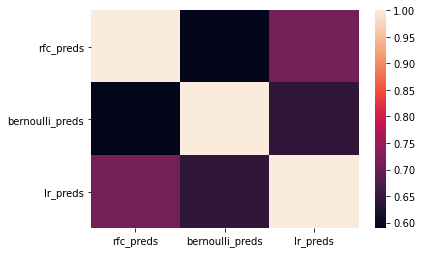

In [ ]:
# Combining all predictions and creating a heatplot of their correlations
all_preds = np.concatenate((rfc_preds.reshape((-1, 1)), bernoulli_preds.reshape((-1, 1))), axis=1)
# all_preds = np.concatenate((all_preds, ada_preds.reshape((-1, 1))), axis=1)
#all_preds = np.concatenate((all_preds, bernoulli_preds.reshape((-1, 1))), axis=1)
#all_preds = np.concatenate((all_preds, gaussian_preds.reshape((-1, 1))), axis=1)
all_preds = np.concatenate((all_preds, lr_preds.reshape((-1, 1))), axis=1)
#all_preds = np.concatenate((all_preds, rc_preds.reshape((-1, 1))), axis = 1)
all_preds_df = pd.DataFrame(all_preds, columns=[ 'rfc_preds', 'bernoulli_preds','lr_preds'])
sns.heatmap(all_preds_df.corr())
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


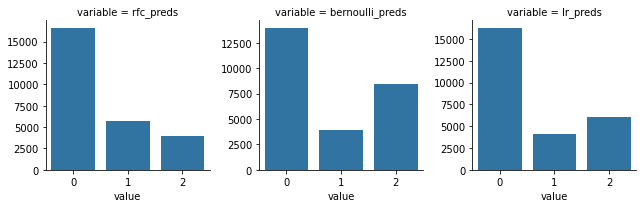

In [ ]:
# Visualizing and comparing the freqencies of predicted classes of all models
all_preds_flat = pd.melt(all_preds_df)
g = sns.FacetGrid(all_preds_flat, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.countplot, 'value')
plt.show()

In [ ]:
# Creating level1_train dataset
level1_train = np.zeros((X_train.shape[0], 16))
skf = StratifiedKFold(n_splits=5)

for tr_idx, te_idx in skf.split(X_train, y_train):
    
    X_tr, y_tr = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    X_te, y_te = X_train.iloc[te_idx], y_train.iloc[te_idx]
    
    # cat_model.fit(X_tr, y_tr)
    # cat_preds = cat_model.predict_proba(X_te)
    # for i in range(3):
    #     level1_train[te_idx, i*7] = cat_preds[:, i]
    
    rfc_clf.fit(X_tr, y_tr)
    rfc_preds = rfc_clf.predict_proba(X_te)
    for i in range(3):
        level1_train[te_idx, i*7] = rfc_preds[:, i]
    
    # ada_clf.fit(X_tr, y_tr)
    # ada_preds = ada_clf.predict_proba(X_te)
    # for i in range(3):
    #     level1_train[te_idx, i*7+2] = ada_preds[:, i]
    
    bernoulli_clf.fit(X_tr, y_tr)
    bernoulli_preds = bernoulli_clf.predict_proba(X_te)
    for i in range(3):
        level1_train[te_idx, i*7+1] = bernoulli_preds[:, i]
    
    # gaussian_clf.fit(X_tr, y_tr)
    # gaussian_preds = gaussian_clf.predict_proba(X_te)
    # for i in range(3):
    #     level1_train[te_idx, i*7+4] = gaussian_preds[:, i]
    
    # svc_clf.fit(X_tr, y_tr)
    # svc_preds = svc_clf.predict_proba(X_te)
    # for i in range(3):
    #     level1_train[te_idx, i*7+5] = svc_preds[:, i]

    # lr.fit(X_tr, y_tr)
    # lr_preds = lr.predict_proba(X_te)
    # for i in range(3):
    #     level1_train[te_idx, i*7+2] = lr_preds[:, i]


In [ ]:
level1_train

(53600, 17)

In [ ]:
# Creating level1_test dataset
level1_test = np.zeros((X_val.shape[0], 16))

# cat_model.fit(X_train, y_train)
# cat_preds = cat_model.predict_proba(X_val)
# for i in range(3):
#     level1_test[:, i*7] = cat_preds[:, i]

rfc_clf.fit(X_train, y_train)
rfc_preds = rfc_clf.predict_proba(X_val)
for i in range(3):
    level1_test[:, i*7] = rfc_preds[:, i]

# ada_clf.fit(X_train, y_train)
# ada_preds = ada_clf.predict_proba(X_val)
# for i in range(3):
#     level1_test[:, i*7+2] = ada_preds[:, i]

bernoulli_clf.fit(X_train, y_train)
bernoulli_preds = bernoulli_clf.predict_proba(X_val)
for i in range(3):
    level1_test[:, i*7+1] = bernoulli_preds[:, i]
    
# gaussian_clf.fit(X_train, y_train)
# gaussian_preds = gaussian_clf.predict_proba(X_val)
# for i in range(3):
#     level1_test[:, i*7+4] = gaussian_preds[:, i]
    
# lr.fit(X_train, y_train)
# lr_preds = lr.predict_proba(X_val)
# for i in range(3):
#     level1_test[:, i*7+2] = lr_preds[:, i]

In [ ]:
meta_clf = RidgeClassifier(normalize=True, class_weight='balanced')
#meta_clf = CatBoostClassifier(max_depth=3)
meta_clf.fit(level1_train, y_train)
meta_preds = meta_clf.predict(level1_test).astype(int)

# sns.countplot(meta_subm['Target'])
# plt.show()
#plot_roc(meta_clf, level1_test, y_val)

In [ ]:
def plot_roc(meta_clf,level1_test, y_val):  
  
  from sklearn.preprocessing import label_binarize
  from sklearn.metrics import roc_curve, auc
  n_classes = 3

  y_test = label_binarize(y_val, classes=[0,1,2])  # only for validation

  y_score = meta_clf.predict_proba(level1_test)

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  print("ROC mean = ", np.mean(list(roc_auc.values())))
  # Plot of a ROC curve for a specific class
  for i in range(n_classes):
      plt.figure()
      plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic example')
      plt.legend(loc="lower right")
      plt.show()

def countplot(df):
  sns.countplot(df)
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


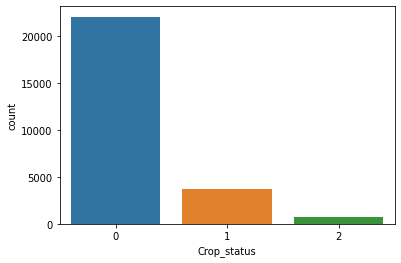

In [ ]:
sns.countplot(y_val)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


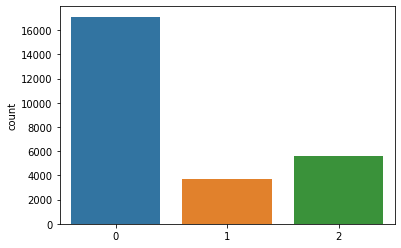

In [ ]:
sns.countplot(meta_preds)
plt.show()

In [ ]:
pd.DataFrame(y_val)

,Crop_status
57302,0
55727,0
65972,0
40414,0
70800,0
...,...
11621,0
17678,0
28225,1
55780,0


In [ ]:
#crude stacking -xgb-lgb,catb,rf different twist, multiclass
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, train_test_split, cross_val_predict, StratifiedKFold, RepeatedStratifiedKFold, KFold

NFOLDS = 2
SEED = 42
NROWS = None
n_classes=3


training_data = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/train.xlsx')
test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')

X, y = set_input(training_data, is_train_set = True, median_imputation = True, dummy = True)
test_df_off= set_input(test_df_off, is_train_set = False, median_imputation = True, dummy = True)

#train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)
ntrain = x_train.shape[0]
ntest = x_test.shape[0]

#whole dataset
# x_train = X
# y_train = y
# x_test = test_df_off
# ntrain = X.shape[0]
# ntest = test_df_off.shape[0]


kf = KFold(n_splits = NFOLDS, shuffle=True, random_state=SEED)



class SklearnWrapper_no_rs(object):
    def __init__(self, clf, seed=0, params=None):
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict_probability(self, x):
        return self.clf.predict_proba(x)

class SklearnWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict_probability(self, x):
        proba = self.clf.predict_proba(x)
        return proba

class XgbWrapper(object):
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 30)

    def train(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, label=y_train)
        self.gbdt = xgb.train(self.param, dtrain, self.nrounds)

    def predict_probability(self, x):
        proba = self.gbdt.predict(xgb.DMatrix(x))
        return proba

class CatboostWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_seed'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict_probability(self, x):
        return self.clf.predict_proba(x)
        
class LightGBMWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['feature_fraction_seed'] = seed
        params['bagging_seed'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict_probability(self, x):
        return self.clf.predict_proba(x)



def get_oof(clf):
    print("Get oof of ", clf)
    oof_train = np.zeros((ntrain,n_classes))
    oof_test = np.zeros((ntest,n_classes))
    oof_test_skf = np.empty((ntest, NFOLDS*n_classes))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.iloc[train_index]
        y_tr = y_train.iloc[train_index]
        x_te = x_train.iloc[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict_probability(x_te)
        oof_test_skf[:,3*i: 3*i + 3] = clf.predict_probability(x_test)
        print("For splitting")

    for i in range(3):
        oof_test[:,i] = (oof_test_skf[:,i]+oof_test_skf[:,i+3])/2

    #oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train, oof_test



et_params = {
    'n_jobs': 16,
    'n_estimators': 10,
    'max_features': 0.5,
    'max_depth': 12,
    #'min_samples_leaf': 2,
}

rf_params = {
    'n_jobs': 16,
    'n_estimators': 10,
    'max_features': 0.2,
    'max_depth': 12,
    #'min_samples_leaf': 2,
}

xgb_params = {
    'objective': 'multi:softprob',
    'eta':0.1,
    'max_depth':6,
    'num_class':3,
    'eval_metric':"mlogloss",
    'min_child_weight': 1,
    'subsample': 0.7,
    'colsample_bytree': 0.7
}

svc_params = {
    'kernel' : 'linear',
    'C' : 0.025,
    'probability': True
    }


catboost_params = {'max_depth': 5,
                   'iterations': 100,
                   'learning_rate': 0.1,
                   'loss_function': 'MultiClass',
                   'early_stopping_rounds': 200,
                   'random_seed': 1,
                   'classes_count': 3,
                   'cat_features':[0,1,2,3,4,5,6,7],
                   'leaf_estimation_method': 'Newton',
                   'random_strength': 0.9,
                   'boosting_type': 'Ordered',
                   'sampling_frequency': 'PerTreeLevel'
                   }

catboost_params_bal = {'max_depth': 5,
                   'iterations': 100,
                   'learning_rate': 0.1,
                   'loss_function': 'MultiClass',
                   'early_stopping_rounds': 200,
                   'random_seed': 1,
                   'classes_count': 3,
                   'cat_features':[0,1,2,3,4,5,6,7],
                   'leaf_estimation_method': 'Newton',
                   'random_strength': 0.9,
                   'boosting_type': 'Ordered',
                   'sampling_frequency': 'PerTreeLevel',
                    'auto_class_weights': 'Balanced'
                   }

# rf = SklearnWrapper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
#svm = SklearnWrapper(clf=SVC, seed=SEED, params=svc_params)
#et = SklearnWrapper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
# knn = SklearnWrapper_no_rs(clf = KNeighborsClassifier, params = knn_params)
# gnb = SklearnWrapper_no_rs(clf = GaussianNB, params= gnb_params)
#xg = XgbWrapper(seed=SEED, params=xgb_params)
cb = CatboostWrapper(clf= CatBoostClassifier, seed = SEED, params=catboost_params)
cb_bal = CatboostWrapper(clf= CatBoostClassifier, seed = SEED, params=catboost_params_bal)

# knn_oof_train, knn_oof_test = get_oof(knn)
# gnb_oof_train, gnb_oof_test = get_oof(gnb)
#xg_oof_train, xg_oof_test = get_oof(xg)
# #et_oof_train, et_oof_test = get_oof(et)
cb_oof_train, cb_oof_test = get_oof(cb)
cb_bal_oof_train, cb_bal_oof_test = get_oof(cb_bal)

#print("knn-CV: {}".format(log_loss(y_train, knn_oof_train)))
# print("gnb-CV: {}".format(log_loss(y_train, gnb_oof_train)))
# print("XG-CV: {}".format(log_loss(y_train, xg_oof_train)))
# # print("ET-CV: {}".format(log_loss(y_train, et_oof_train)))
print("CB-CV: {}".format(log_loss(y_train, cb_oof_train)))
print("CB_BAL-CV: {}".format(log_loss(y_train, cb_bal_oof_train)))


x_train = np.concatenate((cb_oof_train, cb_bal_oof_train), axis=1)
x_test = np.concatenate((cb_oof_test, cb_bal_oof_test), axis=1)

print("{},{}".format(x_train.shape, x_test.shape))


dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

xgb_params = {
    'objective': 'multi:softprob',
    'eta':0.1,
    'max_depth':2,
    'num_class':3,
    'eval_metric':"mlogloss",
    'min_child_weight': 1,
    'subsample': 0.7,
    'colsample_bytree': 0.7
}

res = xgb.cv(xgb_params, dtrain, num_boost_round=50, nfold=1, seed=SEED,
             early_stopping_rounds=10, show_stdv=True, stratified = True)

best_nrounds = res.shape[0] - 1
cv_mean = res.iloc[-1, 0]
cv_std = res.iloc[-1, 1]


print('Ensemble-CV: {0}+{1}'.format(cv_mean, cv_std))
#gbdt = xgb.train(xgb_params, dtrain, best_nrounds)



out_df = pd.DataFrame(gbdt.predict(dtest))

op = []
for x in pd.DataFrame(out_df).index:
  op.append(np.argmax([out_df[0][x],out_df[1][x], out_df[2][x]]))

op = pd.DataFrame(op)

plot_roc(xgb, x_test, y_test)
print_classfn_metrics(out_df, y_test, y_proba = None, is_yproba = False)

Get oof of  <__main__.CatboostWrapper object at 0x7fcab2074320>
0:	learn: 0.9834352	total: 170ms	remaining: 16.8s
1:	learn: 0.8964368	total: 302ms	remaining: 14.8s
2:	learn: 0.8281820	total: 451ms	remaining: 14.6s
3:	learn: 0.7738983	total: 544ms	remaining: 13.1s
4:	learn: 0.7290139	total: 701ms	remaining: 13.3s
5:	learn: 0.6918184	total: 811ms	remaining: 12.7s
6:	learn: 0.6602804	total: 962ms	remaining: 12.8s
7:	learn: 0.6337932	total: 1.11s	remaining: 12.8s
8:	learn: 0.6113311	total: 1.26s	remaining: 12.7s
9:	learn: 0.5921922	total: 1.41s	remaining: 12.7s
10:	learn: 0.5761405	total: 1.54s	remaining: 12.5s
11:	learn: 0.5624138	total: 1.67s	remaining: 12.3s
12:	learn: 0.5500649	total: 1.83s	remaining: 12.2s
13:	learn: 0.5400376	total: 1.93s	remaining: 11.9s
14:	learn: 0.5310229	total: 2.1s	remaining: 11.9s
15:	learn: 0.5235199	total: 2.26s	remaining: 11.9s
16:	learn: 0.5160434	total: 2.42s	remaining: 11.8s
17:	learn: 0.5092156	total: 2.59s	remaining: 11.8s
18:	learn: 0.5037302	total: 2

NameError: ignored

In [ ]:
!pip install mlxtend
!pip install catboost
!pip install xgboost
!pip install lightgbm
import numpy as np
import pandas as pd
from scipy.stats import skew
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, train_test_split, cross_val_predict, StratifiedKFold, RepeatedStratifiedKFold, KFold
from sklearn.utils import resample
import imblearn
from lightgbm import LGBMClassifier
import gc
from numpy import loadtxt
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, accuracy_score, r2_score, roc_curve, auc, mean_squared_error, log_loss, classification_report, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from imblearn.over_sampling import SMOTE, SMOTENC
from catboost import CatBoostClassifier
from math import sqrt
import warnings
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
from mlxtend.classifier import StackingCVClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from matplotlib import pyplot

warnings.filterwarnings("ignore")
drive.mount('/content/drive')

def plot_roc(meta_clf,level1_test, y_test):  
  
  
  n_classes = 3
  y_test = label_binarize(y_test, classes=[0,1,2])  # only for validation
  print(y_test)
  y_score = meta_clf.predict_proba(level1_test)
  print(y_score)
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
      print("(fpr[i], tpr[i]) = ",fpr[i], tpr[i] )
      roc_auc[i] = auc(fpr[i], tpr[i])

  print("ROC mean = ", np.mean(list(roc_auc.values())))
  # Plot of a ROC curve for a specific class
  for i in range(n_classes):
      plt.figure()
      plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic example')
      plt.legend(loc="lower right")
      plt.show()

def countplot(df):
  sns.countplot(df)
  plt.show()

def scale(x):
  #scale data
  scaler = StandardScaler().fit(x)
  df = pd.DataFrame(scaler.transform(x), columns=list(x.columns))
  return df
  
def smote(X_train, y_train):
  #smote
  
  smote = SMOTE(random_state=42) 
  x_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)
  x_train_smote = pd.DataFrame(x_train_smote, columns= list(X_train.columns))
  y_train_smote = pd.DataFrame(y_train_smote)

  return x_train_smote, y_train_smote

def smote_enc(X_train, y_train):
  #smote
  cat, ind = get_categ_list(X_train)
  smote = SMOTENC(random_state=42, categorical_features= ind) 
  x_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)
  x_train_smote = pd.DataFrame(x_train_smote, columns= list(X_train.columns))
  y_train_smote = pd.DataFrame(y_train_smote)

  return x_train_smote, y_train_smote

def set_input(df, is_train_set = True, median_imputation = False, dummy = False):
  df.drop('ID', axis = 1, inplace = True)
  df.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

  if is_train_set:
    X = df.drop("Crop_status", axis=1)
    y = df["Crop_status"]
  else:
    X = df

  if median_imputation:
    X.fillna(X["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)
    X["Number_of_Weeks_Used"] = X["Number_of_Weeks_Used"].astype(np.int) 

  if dummy: 
    X=pd.get_dummies(X, columns= ["Crop","Soil", "Season"])
    X.drop('Soil_clay', axis = 1, inplace = True)
    X.drop('Crop_Feed', axis = 1, inplace = True)
    X.drop('Season_3', axis = 1, inplace = True)
  
  if is_train_set:
    return X,y
  else:
    return X

def print_classfn_metrics(y_pred, y_true, y_proba = None, is_yproba = False):
  print("Testing Accuracy ", accuracy_score(y_true, y_pred))
  print("F1 score ", f1_score(y_true, y_pred, average = 'weighted'))
  if is_yproba:
    print("Logloss score ", log_loss(y_true, y_proba))
  print(confusion_matrix(y_true, y_pred))
  print(classification_report(y_true, y_pred))


def download_csv(pred, name):

  from google.colab import files
  pd.DataFrame(pred).to_csv(name) 
  files.download(name)

def get_categ_list(X):
  categ_var_id = []
  categ_var = []
  for x in list(X.columns):
    if X[x].nunique() <= 3:
      categ_var_id.append(X.columns.get_loc(x))
      categ_var.append(x)
  return categ_var, categ_var_id

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_data = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/train.xlsx')
test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')

# only classes 1 and 2

training_data['Crop_status'] = training_data['Crop_status'].map({2: 0, 1: 0, 0:1})

X, y = set_input(training_data, is_train_set = True, median_imputation = True, dummy = True)
test_df_off= set_input(test_df_off, is_train_set = False, median_imputation = True, dummy = True)


#X, y = smote(X,y)

#scaling
def scale_mod(X):
  scaled_col = ['Insects', 'Does_count', 'Number_of_Weeks_Used', 'Number_Weeks_does_not_used']
  features = X[scaled_col]
  scaler = StandardScaler().fit(features.values)
  features = scaler.transform(features.values)
  X[scaled_col] = features
  return X

X = scale_mod(X)
test_df_off = scale_mod(test_df_off)

X_train = X
y_train = y
X_test = test_df_off
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

def print_classfn_metrics(y_pred, y_true, y_proba = None, is_yproba = False):
    print("Testing Accuracy ", accuracy_score(y_true, y_pred))
    #print("F1 score ", f1_score(y_true, y_pred))
    if is_yproba:
      print("Logloss score ", log_loss(y_true, y_proba))
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

#mo = RandomForestClassifier(random_state = 42)

models = [
         #RandomForestClassifier(random_state = 42),
         KNeighborsClassifier(n_neighbors = 10),
        #  XGBClassifier(random_state = 42),
        #  CatBoostClassifier(random_state=42, verbose = False),
        #  LGBMClassifier(random_state = 42)
         ]

model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# for x in models:
#   grs_rf = x
#   grs_rf.fit(X_train, y_train)
#   pred = grs_rf.predict(X_test)
#   yhat = grs_rf.predict_proba(X_test)

#   pos_probs = yhat[:, 1]

#   pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

#   fpr, tpr, _ = roc_curve(y_test, pos_probs)
#   pyplot.plot(fpr, tpr, marker='.', label= str(grs_rf.__class__))
#   pyplot.xlabel('False Positive Rate')
#   pyplot.ylabel('True Positive Rate')
#   pyplot.legend()
#   # show the plot
#   pyplot.show()
#   roc_auc = roc_auc_score(y_test, pos_probs)
#   print("Roc_auc = ", roc_auc)
#   print_classfn_metrics(pred, y_test, y_proba = None, is_yproba = False)



#download_csv(prediction, 'catboost_smote_7500.csv')

# plot_roc(clf, x_test, y_test)


In [ ]:
pd.DataFrame(pred).value_counts()
pred_ = pred.map({1: 0, 0: 1})

AttributeError: ignored

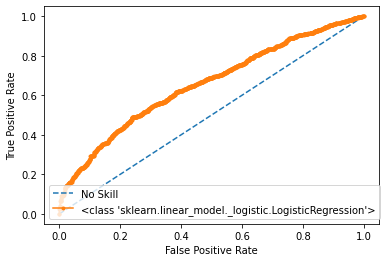

Roc_auc =  0.6564800382194043
Testing Accuracy  0.8419251824817519
[[   0  693]
 [   0 3691]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       693
           1       0.84      1.00      0.91      3691

    accuracy                           0.84      4384
   macro avg       0.42      0.50      0.46      4384
weighted avg       0.71      0.84      0.77      4384



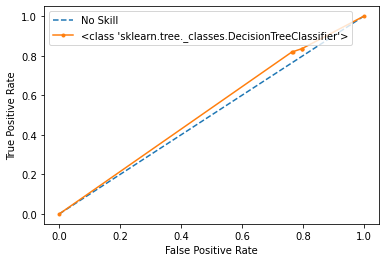

Roc_auc =  0.5264961415056241
Testing Accuracy  0.7281021897810219
[[ 160  533]
 [ 659 3032]]
              precision    recall  f1-score   support

           0       0.20      0.23      0.21       693
           1       0.85      0.82      0.84      3691

    accuracy                           0.73      4384
   macro avg       0.52      0.53      0.52      4384
weighted avg       0.75      0.73      0.74      4384



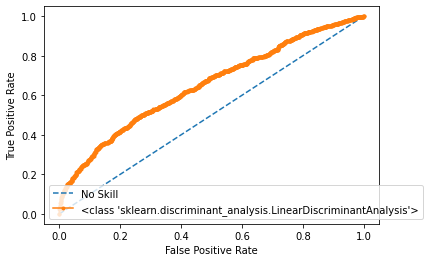

Roc_auc =  0.650334673905522
Testing Accuracy  0.8419251824817519
[[   0  693]
 [   0 3691]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       693
           1       0.84      1.00      0.91      3691

    accuracy                           0.84      4384
   macro avg       0.42      0.50      0.46      4384
weighted avg       0.71      0.84      0.77      4384



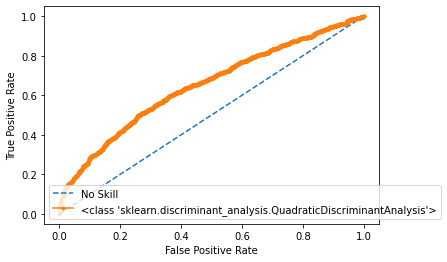

Roc_auc =  0.6512530186331325
Testing Accuracy  0.822536496350365
[[  40  653]
 [ 125 3566]]
              precision    recall  f1-score   support

           0       0.24      0.06      0.09       693
           1       0.85      0.97      0.90      3691

    accuracy                           0.82      4384
   macro avg       0.54      0.51      0.50      4384
weighted avg       0.75      0.82      0.77      4384



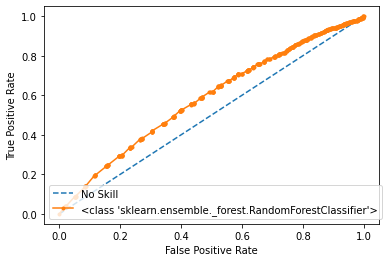

Roc_auc =  0.583377999525385
Testing Accuracy  0.8115875912408759
[[  54  639]
 [ 187 3504]]
              precision    recall  f1-score   support

           0       0.22      0.08      0.12       693
           1       0.85      0.95      0.89      3691

    accuracy                           0.81      4384
   macro avg       0.53      0.51      0.51      4384
weighted avg       0.75      0.81      0.77      4384



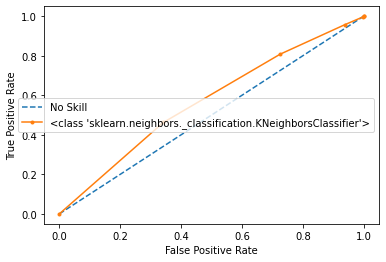

Roc_auc =  0.5709445736538665
Testing Accuracy  0.8156934306569343
[[  43  650]
 [ 158 3533]]
              precision    recall  f1-score   support

           0       0.21      0.06      0.10       693
           1       0.84      0.96      0.90      3691

    accuracy                           0.82      4384
   macro avg       0.53      0.51      0.50      4384
weighted avg       0.74      0.82      0.77      4384



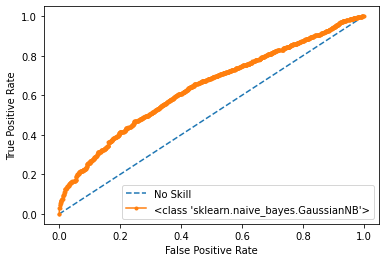

Roc_auc =  0.6408474574283298
Testing Accuracy  0.8419251824817519
[[   0  693]
 [   0 3691]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       693
           1       0.84      1.00      0.91      3691

    accuracy                           0.84      4384
   macro avg       0.42      0.50      0.46      4384
weighted avg       0.71      0.84      0.77      4384



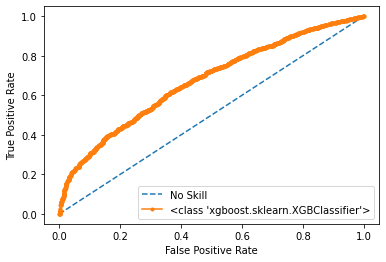

Roc_auc =  0.6729979283487818
Testing Accuracy  0.8419251824817519
[[   0  693]
 [   0 3691]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       693
           1       0.84      1.00      0.91      3691

    accuracy                           0.84      4384
   macro avg       0.42      0.50      0.46      4384
weighted avg       0.71      0.84      0.77      4384



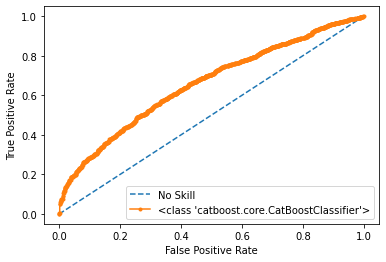

Roc_auc =  0.6586294887568256
Testing Accuracy  0.8412408759124088
[[   3  690]
 [   6 3685]]
              precision    recall  f1-score   support

           0       0.33      0.00      0.01       693
           1       0.84      1.00      0.91      3691

    accuracy                           0.84      4384
   macro avg       0.59      0.50      0.46      4384
weighted avg       0.76      0.84      0.77      4384



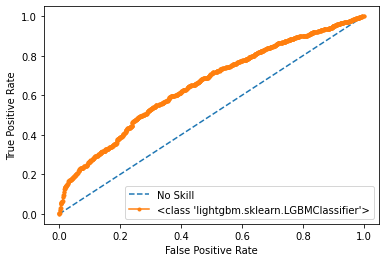

Roc_auc =  0.6531976106617126
Testing Accuracy  0.8416970802919708
[[   4  689]
 [   5 3686]]
              precision    recall  f1-score   support

           0       0.44      0.01      0.01       693
           1       0.84      1.00      0.91      3691

    accuracy                           0.84      4384
   macro avg       0.64      0.50      0.46      4384
weighted avg       0.78      0.84      0.77      4384



In [ ]:
training_data = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/train.xlsx')
test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')

# only classes 1 and 2

training_data_1_2 = training_data.loc[(training_data['Crop_status'] > 0)]
training_data_1_2['Crop_status'] = training_data_1_2['Crop_status'].map({2: 0, 1: 1})

X, y = set_input(training_data_1_2, is_train_set = True, median_imputation = True, dummy = True)
test_df_off= set_input(test_df_off, is_train_set = False, median_imputation = True, dummy = True)


#X, y = smote(X,y)

#scaling
scaled_col = ['Insects', 'Does_count', 'Number_of_Weeks_Used', 'Number_Weeks_does_not_used']
features = X[scaled_col]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X[scaled_col] = features


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)



grs_rf = RandomForestClassifier(random_state = 42)


models = [
LogisticRegression(),
DecisionTreeClassifier(),
#SVC(probability = True),
LinearDiscriminantAnalysis(),
QuadraticDiscriminantAnalysis(),
RandomForestClassifier(random_state = 42),
KNeighborsClassifier(),
GaussianNB(),
XGBClassifier(random_state = 42),
CatBoostClassifier(random_state=42, verbose = False),
LGBMClassifier(random_state = 42)
]


for x in models:
  grs_rf = x
  grs_rf.fit(X_train, y_train)
  pred = grs_rf.predict(X_test)
  yhat = grs_rf.predict_proba(X_test)

  pos_probs = yhat[:, 1]

  pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

  fpr, tpr, _ = roc_curve(y_test, pos_probs)
  pyplot.plot(fpr, tpr, marker='.', label= str(grs_rf.__class__))
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  pyplot.legend()
  # show the plot
  pyplot.show()
  roc_auc = roc_auc_score(y_test, pos_probs)
  print("Roc_auc = ", roc_auc)
  print_classfn_metrics(pred, y_test, y_proba = None, is_yproba = False)



#download_csv(prediction, 'catboost_smote_7500.csv')

# plot_roc(clf, x_test, y_test)


In [ ]:
y_test.value_counts()

0    3691
1    3690
dtype: int64